In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

In [2]:
df=pd.read_csv('salary.csv')

# Cleaning the data

In [11]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)


In [16]:
def remove_outlier_IQR(df):
    num_columns = [x for x in df.columns if df[x].dtype !=object]
    reduced_df=df[num_columns]
    Q1=reduced_df.quantile(0.25)
    Q3=reduced_df.quantile(0.75)
    IQR=Q3-Q1
    df_final_index=reduced_df[~((reduced_df<(Q1-1.5*IQR)) | (reduced_df>(Q3+1.5*IQR)))].index
    return df.loc[df_final_index.values]
 

In [17]:
df= remove_outlier_IQR(df)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
df.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Exploratory the data

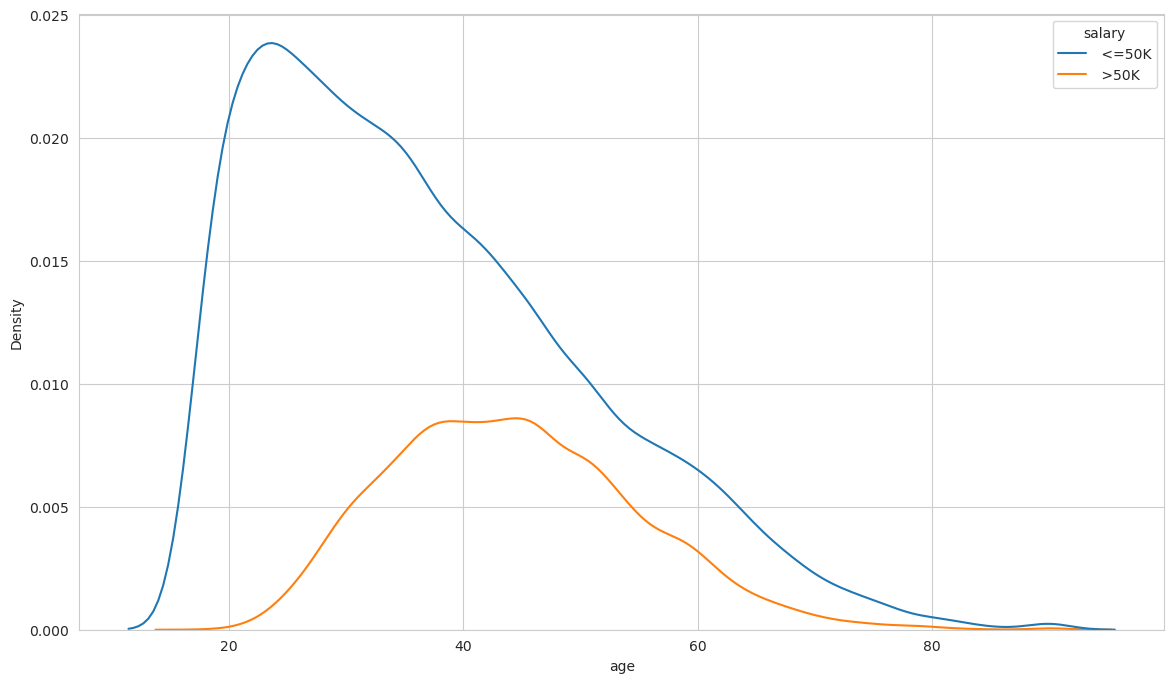

In [19]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'age' ,hue='salary')
plt.show()

In [20]:
df_old = df[(df.age >= 80)&(df['hours-per-week'] >=50)]
df_old

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
5406,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K
6232,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
7481,83,Private,195507,HS-grad,9,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10545,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
11996,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K


In [21]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [22]:
df.occupation.fillna(value='Other-service' , inplace=True)
df['native-country'].fillna(value='Other-country' , inplace=True)
df.workclass.fillna(value='Other' , inplace=True)
df.drop(df.loc[df_old.index].index,axis=0,inplace=True)

In [23]:
df_young = df[(df.age <=20)&(df['salary'] ==' >50K')]
df_young

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7741,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K
22910,19,Other,200790,12th,8,Married-civ-spouse,Other-service,Other-relative,White,Female,15024,0,40,United-States,>50K


In [24]:
df.drop(df.loc[df_young.index].index,axis=0,inplace=True)


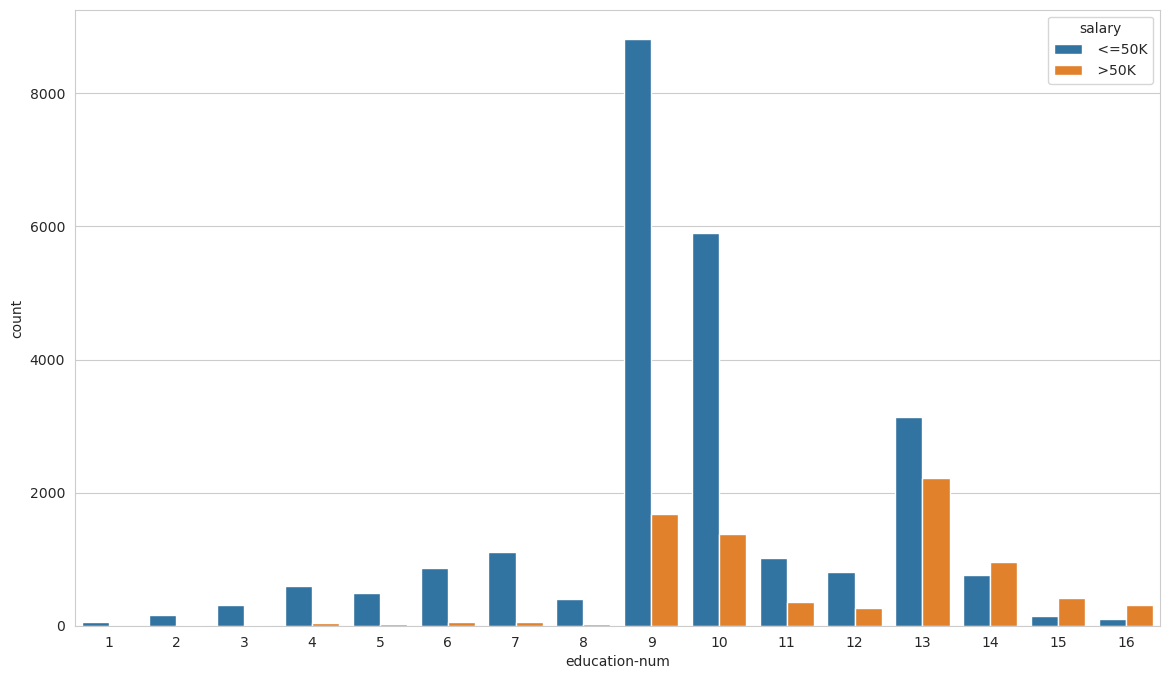

In [25]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'education-num', hue = 'salary')
plt.show()

In [26]:
df_man_women=pd.get_dummies(df , columns=[  'salary'])
df_man_women=pd.pivot_table(df_man_women,  index='education-num',columns= 'sex',values=['salary_ <=50K' , 'salary_ >50K'],    
               aggfunc=np.sum).reset_index()
df_man_women['salary_ >50K'] = (df_man_women['salary_ >50K'] / (df_man_women['salary_ >50K']+ df_man_women['salary_ <=50K']))

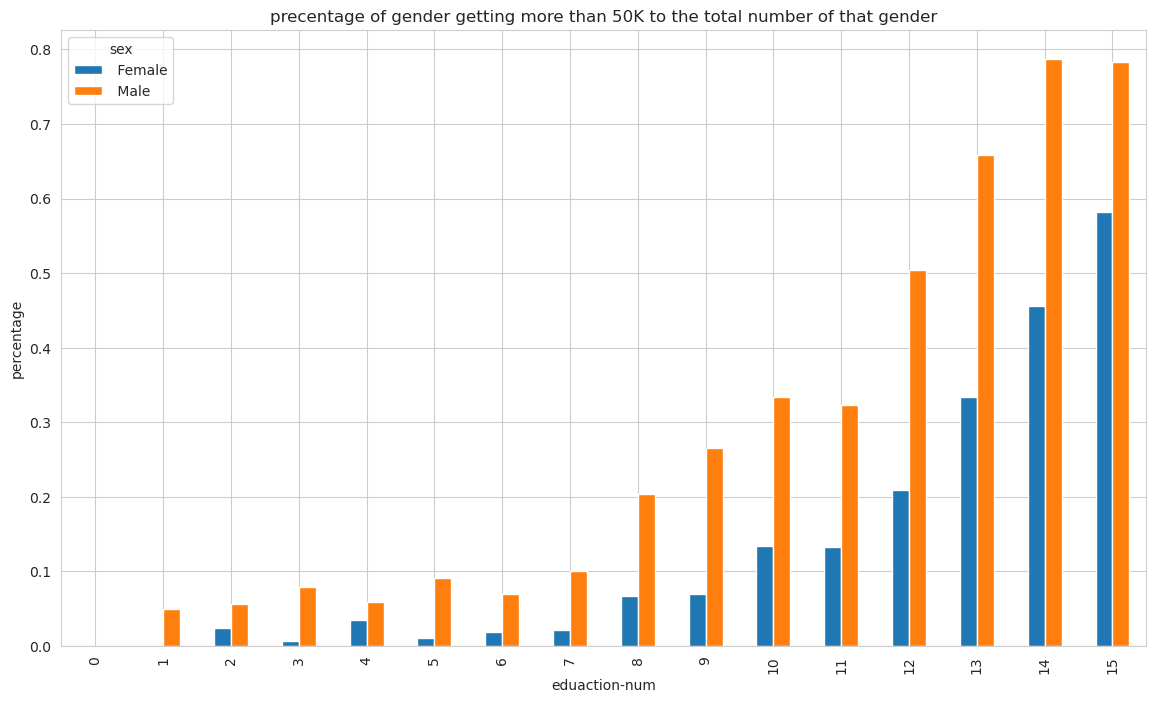

In [27]:
df_man_women['salary_ >50K'].plot(figsize=(14,8), kind = 'bar')
plt.title('precentage of gender getting more than 50K to the total number of that gender')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

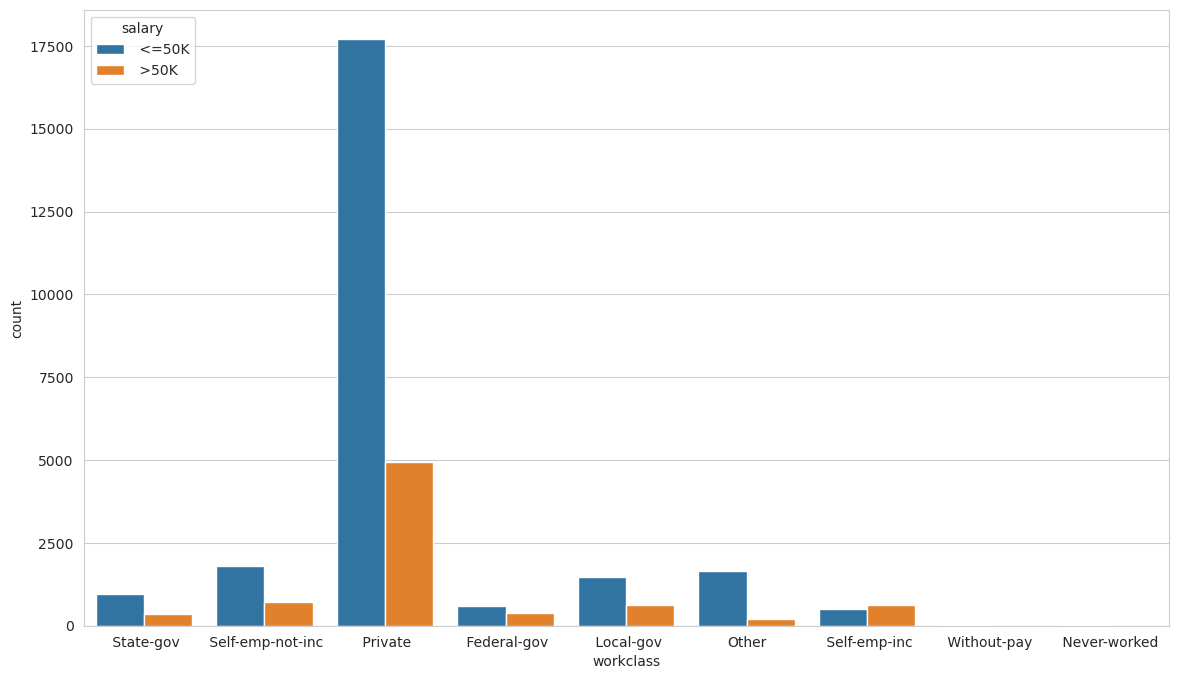

In [28]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'workclass', hue = 'salary')
plt.show()

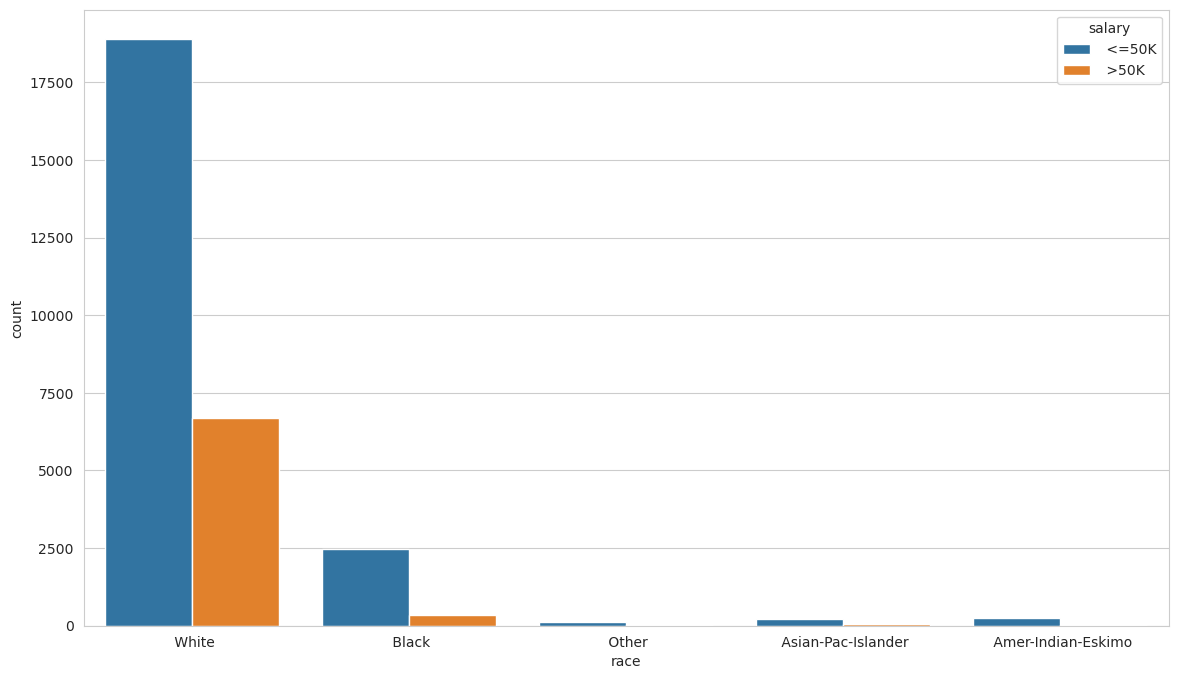

In [30]:
plt.figure(figsize=(14,8))
sns.countplot(data =df[df['native-country'] ==' United-States'] , x = 'race', hue = 'salary')
plt.show()

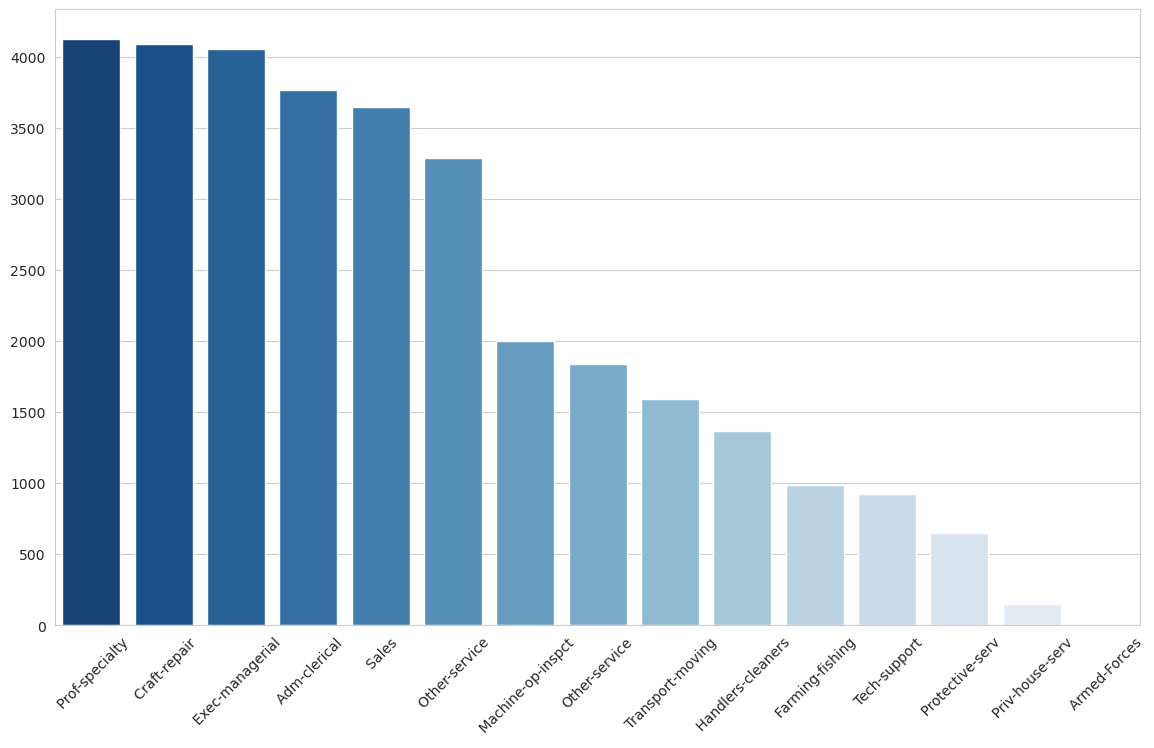

In [31]:
occupation = df['occupation'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =occupation.index , y =occupation.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

# Data Processing

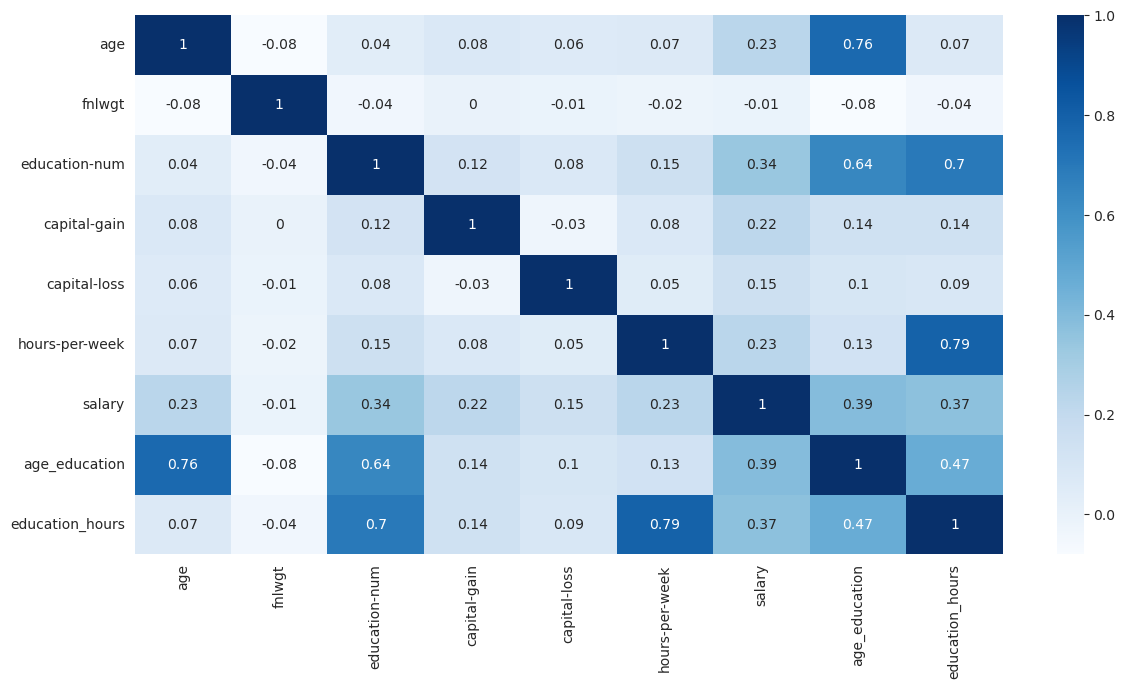

In [32]:
df['salary'] = df['salary'].map( {' >50K': 1, ' <=50K': 0} )
df['age_education'] = df['age'] * df['education-num']
df['education_hours'] = df['education-num'] * df['hours-per-week']
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
y = df['salary']
df.drop('salary' ,axis = 1 , inplace=True)
num_cols = [x for x in df.columns if df[x].dtype != 'object']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

In [34]:
df.drop('education' ,axis = 1 , inplace=True)

In [35]:
df['native-country'].value_counts()

 United-States                 29137
 Mexico                          639
Other-country                    581
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [36]:
df['native-country'] =df['native-country'].apply(lambda x : x.strip())
cat_col = [x for x in df.columns if df[x].dtype == 'object']
df=pd.get_dummies(df , columns=cat_col , drop_first=True)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df , y , test_size=0.2 ,shuffle=True, random_state=41)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (26015, 87)
Shape of testing feature: (6504, 87)
Shape of training label: (26015,)
Shape of training label: (6504,)


# Modeling the data

In [38]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

/home/zoz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zoz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

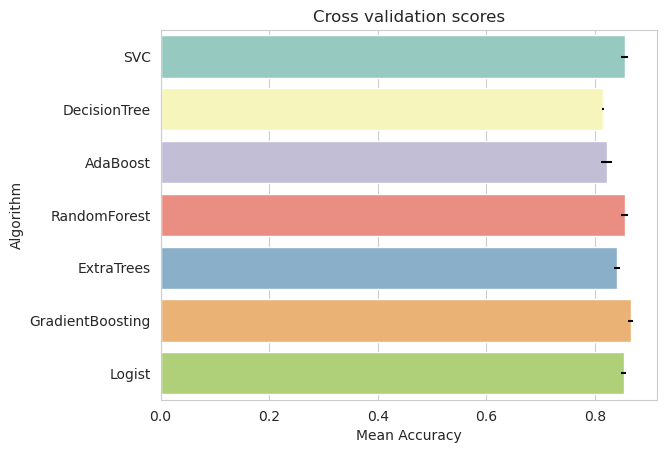

In [40]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X_train, y_train, scoring = "accuracy", cv =5, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Logist"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [41]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                'n_estimators' : [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [4, 8],
                'min_samples_leaf': [100,150],
                'max_features': [0.3, 0.1]
}
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.8694214876033058

In [42]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train , y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.8631558716125312

In [43]:
logC = LogisticRegression()
log_param_grid={'penalty':['l2','l1'] ,
                'dual':[True , False],
                'C':[0.01 , 0.1 , 1 , 1, 10 ]}
gslogC = GridSearchCV(logC,param_grid = log_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gslogC.fit(X_train, y_train)
logC_best = gslogC.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/zoz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zoz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [44]:
chosen_classifiers = [GBC_best, logC_best,RFC_best]


In [46]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc': auc, 'cm': cm}

In [47]:
GBC_eval =  evaluate_model(GBC_best, X_test, y_test)
print('Accuracy:', GBC_eval['acc'])
print('Precision:', GBC_eval['prec'])
print('Recall:', GBC_eval['rec'])
print('F1 Score:', GBC_eval['f1'])
print('Area Under Curve:', GBC_eval['auc'])
print('Confusion Matrix:\n', GBC_eval['cm'])

Accuracy: 0.8705412054120542
Precision: 0.7707244212098581
Recall: 0.6585832801531589
F1 Score: 0.7102546455609084
Area Under Curve: 0.9246445222567594
Confusion Matrix:
 [[4630  307]
 [ 535 1032]]


In [48]:
logC_best_eval =  evaluate_model(logC_best, X_test, y_test)
print('Accuracy:', logC_best_eval['acc'])
print('Precision:', logC_best_eval['prec'])
print('Recall:', logC_best_eval['rec'])
print('F1 Score:', logC_best_eval['f1'])
print('Area Under Curve:', logC_best_eval['auc'])
print('Confusion Matrix:\n', logC_best_eval['cm'])

Accuracy: 0.8510147601476015
Precision: 0.7317829457364341
Recall: 0.6024250159540523
F1 Score: 0.6608330416520826
Area Under Curve: 0.9058175125276634
Confusion Matrix:
 [[4591  346]
 [ 623  944]]


In [49]:
RFC_best_eval =  evaluate_model(RFC_best, X_test, y_test)
print('Accuracy:', RFC_best_eval['acc'])
print('Precision:', RFC_best_eval['prec'])
print('Recall:', RFC_best_eval['rec'])
print('F1 Score:', RFC_best_eval['f1'])
print('Area Under Curve:', RFC_best_eval['auc'])
print('Confusion Matrix:\n', RFC_best_eval['cm'])

Accuracy: 0.8645448954489545
Precision: 0.7705047318611987
Recall: 0.6234843650287173
F1 Score: 0.6892416225749559
Area Under Curve: 0.9178747302159087
Confusion Matrix:
 [[4646  291]
 [ 590  977]]


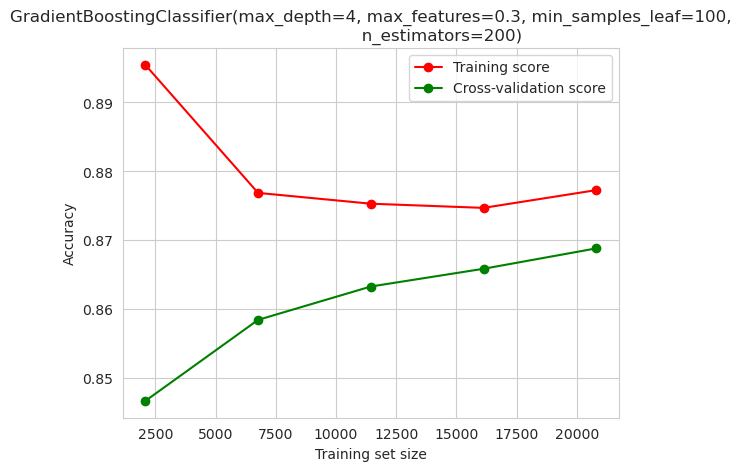

/home/zoz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zoz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

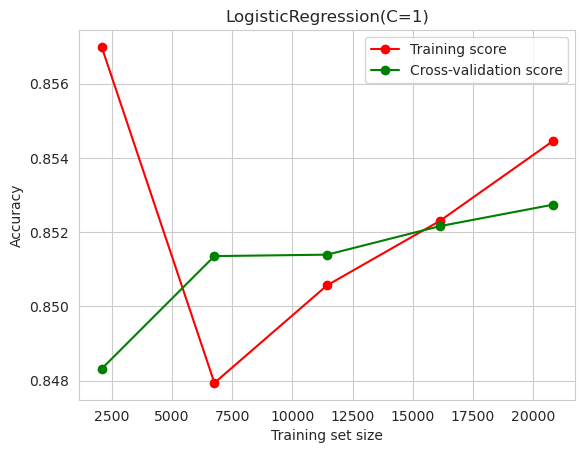

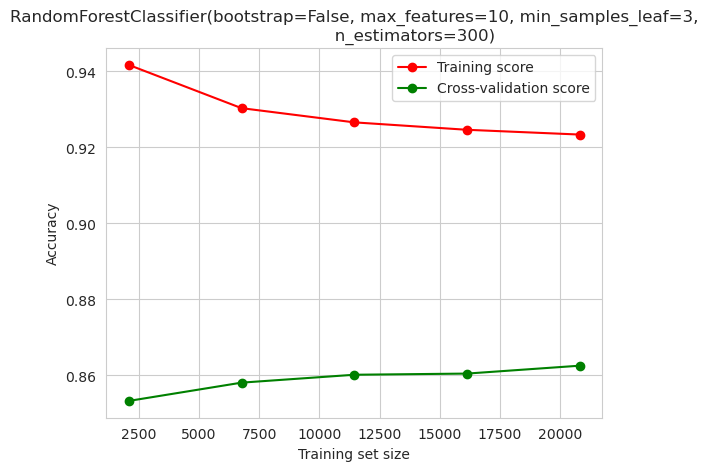

In [50]:
def plot_learning_curve(models , X , y):
        for model in models :
            train_sizes , train_scores , test_scores =learning_curve(model ,X , y , n_jobs=-1 )
            train_scores_mean = np.mean(train_scores ,axis = 1)
            test_scores_mean = np.mean(test_scores ,axis=1)
            plt.plot(train_sizes , train_scores_mean , 'o-' , color ='r' , label = 'Training score')
            plt.plot(train_sizes , test_scores_mean , 'o-' , color ='g' , label = 'Cross-validation score')
            plt.xlabel('Training set size')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(model)
            plt.show()
plot_learning_curve(chosen_classifiers , X_train , y_train)
